In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [3]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.5262 - accuracy: 0.4499 - val_loss: 0.4583 - val_accuracy: 0.4845
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4245 - accuracy: 0.4889 - val_loss: 0.4047 - val_accuracy: 0.4888
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3934 - accuracy: 0.4922 - val_loss: 0.3856 - val_accuracy: 0.4912
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3761 - accuracy: 0.4948 - val_loss: 0.3702 - val_accuracy: 0.4942
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3620 - accuracy: 0.4972 - val_loss: 0.3579 - val_accuracy: 0.4965


## 1. Adding hidden layer to autoencoders 

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img1 = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(encoding_dim, activation='relu')(input_img1)
hiddenlayer = Dense(512,activation='relu')(encoded1)
# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(784, activation='sigmoid')(hiddenlayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img1, decoded1)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [7]:
(x_train1, y_train1), (x_test1, y_test1) = fashion_mnist.load_data()
x_train1 = x_train1.astype('float32') / 255.
x_test1 = x_test1.astype('float32') / 255.
x_train1 = x_train1.reshape((len(x_train1), np.prod(x_train1.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))

autoencoder1.fit(x_train1, x_train1,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test1, x_test1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.4951 - accuracy: 0.4612 - val_loss: 0.4091 - val_accuracy: 0.4879
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3892 - accuracy: 0.4916 - val_loss: 0.3761 - val_accuracy: 0.4915
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3630 - accuracy: 0.4957 - val_loss: 0.3545 - val_accuracy: 0.4946
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3436 - accuracy: 0.4997 - val_loss: 0.3396 - val_accuracy: 0.5009
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3330 - accuracy: 0.5017 - val_loss: 0.3312 - val_accuracy: 0.4983


## 2.Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [8]:
import matplotlib.pyplot as plt

In [9]:
#Prediction on test data 
prediction = autoencoder1.predict(x_test1)

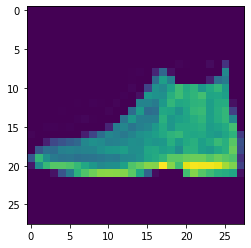

In [10]:
# Vizualizing one of the test data before reconstructing
image = x_test1[0].reshape(28, 28)
plt.imshow(image)
plt.show()

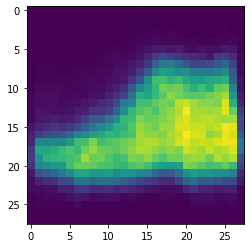

In [11]:
# visualize one of the reconstructed version of that test data
image = prediction[0].reshape(28, 28)
plt.imshow(image)
plt.show()

## 3.Repeat the question 2 on the denoisening autoencoder

In [12]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.3611 - accuracy: 0.4975 - val_loss: 0.3482 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3531 - accuracy: 0.4990 - val_loss: 0.3402 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3468 - accuracy: 0.5001 - val_loss: 0.3336 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.3416 - accuracy: 0.5010 - val_loss: 0.3281 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3372 - accuracy: 0.5017 - val_loss: 0.3235 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.3335 - accuracy: 0.5023 - val_loss: 0.3193 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

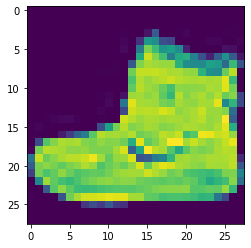

In [13]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[0].reshape(28,28))
plt.show()

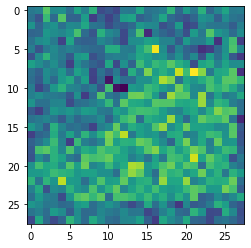

In [14]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [15]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

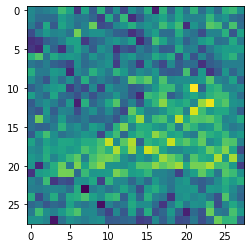

In [16]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[0].reshape(28,28))
plt.show()

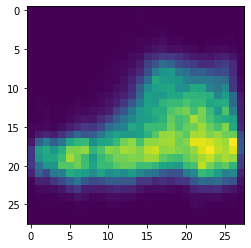

In [17]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

## 4.plot loss and accuracy using the history object

In [18]:
autoencoder.metrics_names

['loss', 'accuracy']

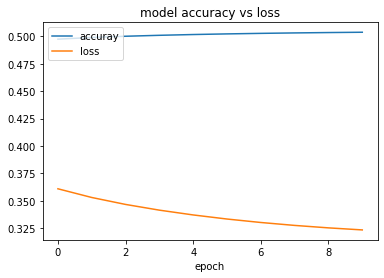

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

## Bonus question:
## Visualize the compressed version of the input data in the middle layer.

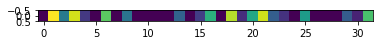

In [20]:

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


encoder = Model(input_img, encoded)

encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[2],:])

from matplotlib import pyplot as plt
plt.imshow(encoded_imgs)
plt.show()